### proyecto de casas en israel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #para hacer graficas
import seaborn as sns #hacer graficas
import numpy as np #metodo numericos
from scipy.stats import norm #Este es el que se utiliza para poder ver metodos estadisticos
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 

%matplotlib inline

# Step 1 



1.   Leemos mi archivo CSV.
2.   verificamos cuales son las columnas de mis dataset.
3.   observamos si hay valores nulos dentro de mi dataset y los tipos de valores que tenemos dentro de este.



In [2]:
df=pd.read_csv('precio casas.csv',sep=';')

In [3]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [5]:
df.shape

(3479, 8)

# Step 2

1. Decidimos obversar cuales son los valores que estan nulos. 
2. Nos enfretamos a nuestra primera decisión ¿ Que hago con los valores nulos, los promedio, los elimino o elimino la columna?


In [6]:
df[pd.isnull(df["Address"])==True].head(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
43,60,2,True,True,True,NaN,2.650000e+09,88333.33
662,85,2,True,True,True,NaN,1.955000e+09,65166.67
706,117,2,True,True,True,NaN,6.500000e+09,216666.67


Vemos que son valores de dirección que de cierta forma nos pueden aportar valor a nuestro EDA por que observaremos por dirección los precios de las casas. sin embargo, para objeto de nuestro EDA vamos a elminar estos datos para ver la distribución por Addrees.

In [7]:
idx=df[pd.isnull(df["Address"])==True].index.tolist()

In [8]:
df1=df.drop(index=idx)

In [9]:
df1.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

En este apartado vamos agregar columnas que nos permitan tener una mejor lectura de la variables booleanas

In [10]:
df1["Park"]=df1["Parking"].map({True:"YES",False:"NO"})
df1["Ware"]=df1["Warehouse"].map({True:"YES",False:"NO"})
df1["Ele"]=df1["Elevator"].map({True:"YES",False:"NO"})

# Step 3



1.   Vamos a ver los tipos de distribución, presentes en nuestro datos numericos
2.   Vamor a ver la contabilización de nuestras variables Categoricas
3.   vamos a ver las correlaciones presentes en mis datos.



In [11]:
figure ,ax = plt.subplots(2,3,figsize=(20,10),dpi=1000)
plt.style.use("seaborn")
figure.suptitle("Distribución de los valores numericos")
ax[0,0].hist(x=df1["Area"])
ax[0,1].hist(x=df1["Room"])
ax[0,2].hist(x=df1["Price(USD)"])
ax[1,0]=sns.countplot(data=df1,x=df1["Park"],ax=ax[1,0],palette="tab10")
ax[1,1]=sns.countplot(data=df1,x=df1["Ware"],ax=ax[1,1],palette="rocket")
ax[1,2]=sns.countplot(data=df1,x=df1["Ele"],ax=ax[1,2],palette="tab10")
ax[1,0].set_ylim(0,4000)
ax[1,1].set_ylim(0,4000)
ax[1,2].set_ylim(0,4000)
ax[0,0].set_xlabel("Area")
ax[0,1].set_xlabel("Rooms")
ax[0,2].set_xlabel("Prices (USD)");


In [12]:
df1.describe().round(0)


,Area,Room,Price,Price(USD)
count,3456.0,3456.0,3.456000e+03,3456.0
mean,107.0,2.0,5.379957e+09,179332.0
std,70.0,1.0,8.121729e+09,270724.0
min,1.0,0.0,3.600000e+06,120.0
25%,69.0,2.0,1.420000e+09,47333.0
50%,90.0,2.0,2.900000e+09,96667.0
75%,120.0,2.0,6.000000e+09,200000.0
max,929.0,5.0,9.240000e+10,3080000.0


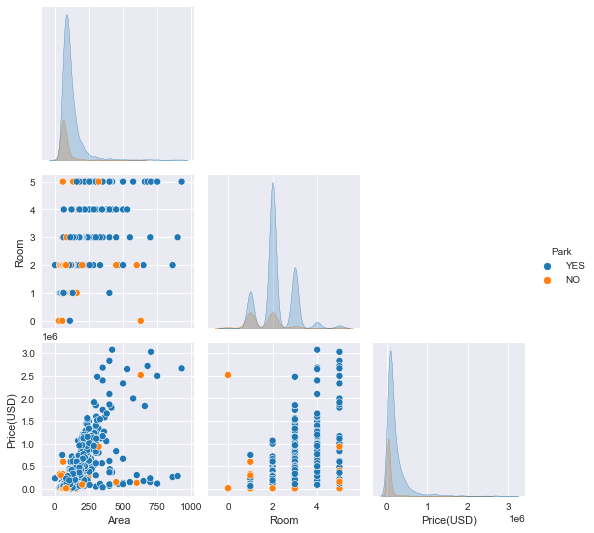

In [13]:
sns.pairplot(df1,x_vars=["Area","Room","Price(USD)"],y_vars=["Area","Room","Price(USD)"],palette="tab10",hue="Park",corner=True)

In [14]:
df_corr=df1.corr()

<AxesSubplot:>

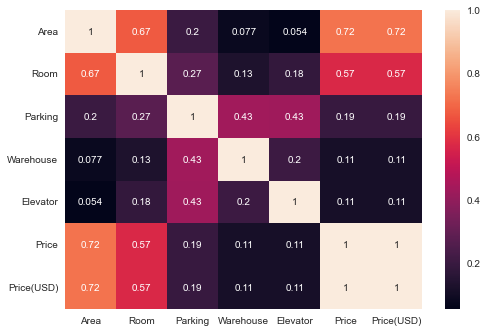

In [15]:
sns.heatmap(df_corr,annot=True)

Observando las medidas de tendencia estandar que que hemos graficado anteriormente, observamos una correlación positiva entre el Area, room y Price(USD).

<AxesSubplot:xlabel='Price(USD)', ylabel='Area'>

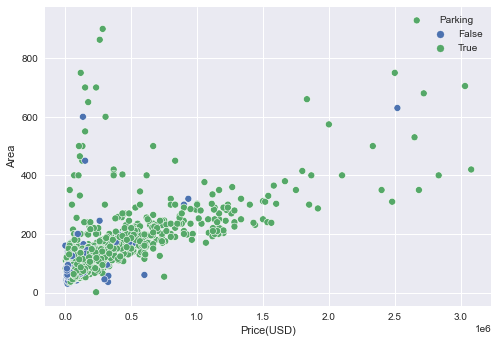

In [16]:
sns.scatterplot(data=df1,x="Price(USD)",y="Area",hue="Parking")

In [17]:
df1["Address"].nunique() # tenemos 192 direcciones unicas donde se concentran nuestros datos.

192

In [18]:
df["Address"].value_counts().head(10)

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Southern Janatabad         93
Central Janatabad          91
Name: Address, dtype: int64

In [19]:
df1.shape[0]

3456

In [20]:
li=[x for x in range(0,150)]
por=[]
for i in range(0,150):
    por.append((df1["Address"].value_counts().head(i).sum())/df1.shape[0])

Text(0, 0.5, 'Procentaje de total de datos')

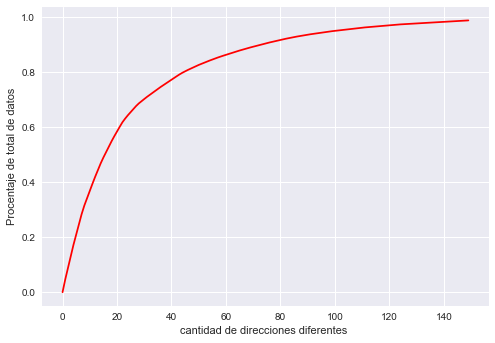

In [21]:
plt.plot(li,por,"r")
plt.xlabel("cantidad de direcciones diferentes ")
plt.ylabel("Procentaje de total de datos")

In [22]:
suma=(df1["Address"].value_counts().head(50).sum())/df1.shape[0]
print(f'El porcentaje que representan las 50 direcciones que mas se venden casas en teheran es de {suma:.2%}')

El porcentaje que representan las 50 direcciones que mas se venden casas en teheran es de 82.55%


Estos datos que acabamos de averiguar me hacen preguntar ¿Por que los primero 50 direcciones representan el 82.55% de mi datos? ¿Que caracteristicas especiales tienen estos barrios en cuestion de Area, price(USD) y Rooms con respecto a los otros?

In [23]:
dir=df1["Address"].value_counts().head(50).index

In [24]:
df2=df1[df1["Address"].isin(dir)]

In [25]:
df2.shape

(2853, 11)

In [26]:
df2.groupby(["Address"]).std()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Address,,,,,,,
Abazar,128.117427,0.702902,0.000000,0.000000,0.208514,1.803672e+10,601224.025763
Andisheh,85.379344,1.138383,0.353813,0.239379,0.475679,2.600598e+09,86686.596852
Aqdasieh,65.937015,0.842615,0.000000,0.000000,0.276887,1.517440e+10,505813.427093
Azarbaijan,43.903303,0.832971,0.481543,0.204124,0.508977,2.818158e+09,93938.590329
Beryanak,22.688690,0.585947,0.458258,0.331662,0.509902,5.030331e+08,16767.770375
Central Janatabad,25.353717,0.389734,0.104828,0.104828,0.351866,9.631545e+08,32105.148149
Damavand,265.688940,0.733178,0.486985,0.499011,0.448978,4.414809e+09,147160.297121
East Ferdows Boulevard,40.362088,0.693760,0.000000,0.000000,0.312636,2.684935e+09,89497.824518
Ekhtiarieh,105.023033,0.830599,0.000000,0.000000,0.215540,1.222110e+10,407370.156757


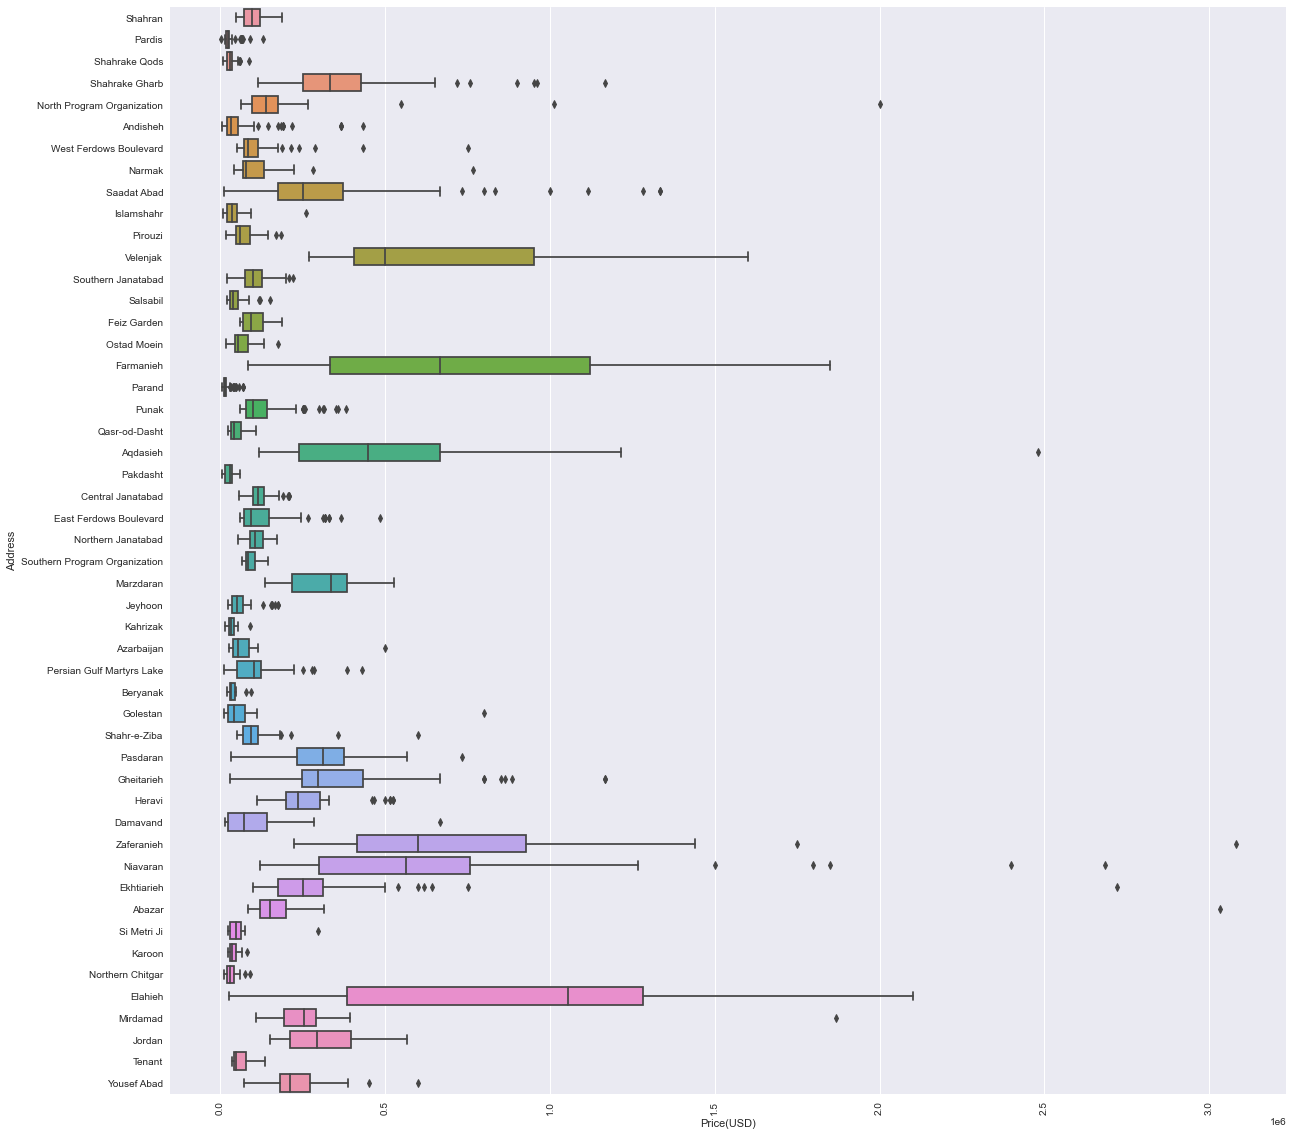

In [27]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df2,y=df2["Address"],x=df2["Price(USD)"])
plt.xticks(rotation=90);


despues de ver la grafica anterior hay una serie de Address que me llaman la atencion, 1. por que no tiene valores anormales y dos por que recogen toda la gama de precios que puede haber, este es el caso como de Elahie, aqdashie, farmanieh y Velenjak

In [49]:
vel=df2[df2["Address"]=="Jeyhoon"]

<AxesSubplot:xlabel='Room', ylabel='Count'>

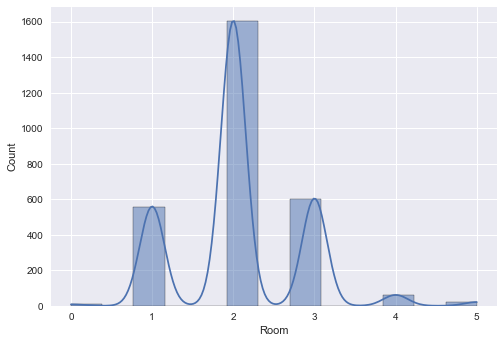

In [58]:
sns.histplot(data=df2,x=df2["Room"])

<AxesSubplot:xlabel='Area'>

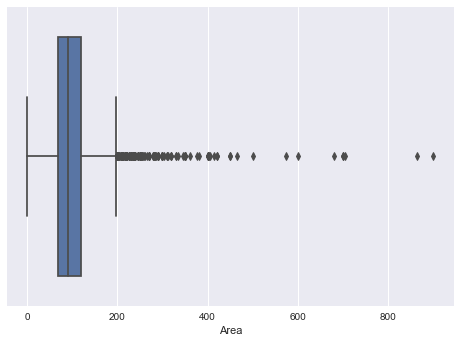

In [60]:
sns.boxplot(data=df2,x=df2["Area"])

In [55]:
df2.describe().round(0)

,Area,Room,Price,Price(USD)
count,2853.0,2853.0,2.853000e+03,2853.0
mean,105.0,2.0,5.379831e+09,179328.0
std,63.0,1.0,7.819196e+09,260640.0
min,1.0,0.0,6.000000e+07,2000.0
25%,68.0,2.0,1.400000e+09,46667.0
50%,90.0,2.0,2.900000e+09,96667.0
75%,120.0,2.0,6.150000e+09,205000.0
max,900.0,5.0,9.240000e+10,3080000.0


In [29]:
f=sns.lmplot(data=df2,x="Price(USD)",y="Area",height=8,palette="pastel",size=df2["Address"])
plt.title("Precios de Casa")
plt.grid(visible=True,alpha=0.2,ls='--',lw=0.5,color='k')
plt.axis(ymax=400,xmax=1000000)
plt.show()

C:\Users\piere\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
df3=pd.concat([df2["Area"],df2["Room"],df2["Price(USD)"]],axis=1)

In [ ]:
df3.head(10)

In [ ]:
corre=df3.corr()

In [ ]:
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corre, vmax=0.8,square=True,annot=True)

##### En este caso nos damos cuenta que las relaciones mas importantes para las casa de teheran son las de area y precio, y menor medida la cantidad de rooms con la cantidad de area